In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from datetime import datetime,timedelta

In [2]:
df = pd.read_csv('./data/OHLC/ohlc_1hour_data.csv')
df

,bucket,id,open,high,low,close,volume
0,2024-04-17 05:00:00+00,1INCHBTC,6.260000e+03,6.270000e+03,6.180000e+03,6.200000e+03,2.225400e+03
1,2024-04-17 05:00:00+00,1INCHUSDT,4.021000e+08,4.041000e+08,3.949000e+08,3.965000e+08,2.909090e+05
2,2024-04-17 05:00:00+00,AAVEBTC,1.355000e+06,1.355000e+06,1.341000e+06,1.341000e+06,1.215000e+01
3,2024-04-17 05:00:00+00,AAVEUSDT,8.688000e+10,8.715000e+10,8.559000e+10,8.580000e+10,2.008885e+03
4,2024-04-17 05:00:00+00,ACMUSDT,2.420000e+09,2.426000e+09,2.403000e+09,2.425000e+09,3.051210e+04
...,...,...,...,...,...,...,...
313934,2024-03-18 07:00:00+00,ZENUSDT,1.509000e+10,1.519000e+10,1.493000e+10,1.505000e+10,2.233372e+04
313935,2024-03-18 07:00:00+00,ZILBTC,4.900000e+02,5.000000e+02,4.900000e+02,5.000000e+02,1.082700e+04
313936,2024-03-18 07:00:00+00,ZILUSDT,3.406000e+07,3.407000e+07,3.351000e+07,3.363000e+07,1.065007e+07
313937,2024-03-18 07:00:00+00,ZRXBTC,1.851000e+04,1.864000e+04,1.847000e+04,1.850000e+04,3.746400e+04


In [3]:
df = df[df['id'] == '1INCHBTC'].iloc[::-1].reset_index(drop = True)
df

,bucket,id,open,high,low,close,volume
0,2024-03-18 07:00:00+00,1INCHBTC,8600.0,8600.0,8560.0,8600.0,4921.1
1,2024-03-18 08:00:00+00,1INCHBTC,8600.0,8600.0,8470.0,8540.0,7732.4
2,2024-03-18 09:00:00+00,1INCHBTC,8500.0,8500.0,8380.0,8400.0,316758.4
3,2024-03-18 10:00:00+00,1INCHBTC,8410.0,8460.0,8380.0,8450.0,21921.5
4,2024-03-18 11:00:00+00,1INCHBTC,8450.0,8520.0,8420.0,8470.0,5269.5
...,...,...,...,...,...,...,...
714,2024-04-17 01:00:00+00,1INCHBTC,6220.0,6230.0,6160.0,6220.0,13315.0
715,2024-04-17 02:00:00+00,1INCHBTC,6200.0,6200.0,6160.0,6200.0,2558.7
716,2024-04-17 03:00:00+00,1INCHBTC,6220.0,6230.0,6190.0,6200.0,2365.6
717,2024-04-17 04:00:00+00,1INCHBTC,6220.0,6270.0,6200.0,6270.0,2097.9


In [4]:
df['date'] = pd.to_datetime(df['bucket'])
def date_timeStamp(x):
    timestamp=[]
    for i in range(len(x)):
        timestamp.append(datetime.timestamp(x['date'][i]))
    x['date'] = timestamp
    return x

df = date_timeStamp(df)

In [5]:
df

,bucket,id,open,high,low,close,volume,date
0,2024-03-18 07:00:00+00,1INCHBTC,8600.0,8600.0,8560.0,8600.0,4921.1,1.710745e+09
1,2024-03-18 08:00:00+00,1INCHBTC,8600.0,8600.0,8470.0,8540.0,7732.4,1.710749e+09
2,2024-03-18 09:00:00+00,1INCHBTC,8500.0,8500.0,8380.0,8400.0,316758.4,1.710752e+09
3,2024-03-18 10:00:00+00,1INCHBTC,8410.0,8460.0,8380.0,8450.0,21921.5,1.710756e+09
4,2024-03-18 11:00:00+00,1INCHBTC,8450.0,8520.0,8420.0,8470.0,5269.5,1.710760e+09
...,...,...,...,...,...,...,...,...
714,2024-04-17 01:00:00+00,1INCHBTC,6220.0,6230.0,6160.0,6220.0,13315.0,1.713316e+09
715,2024-04-17 02:00:00+00,1INCHBTC,6200.0,6200.0,6160.0,6200.0,2558.7,1.713319e+09
716,2024-04-17 03:00:00+00,1INCHBTC,6220.0,6230.0,6190.0,6200.0,2365.6,1.713323e+09
717,2024-04-17 04:00:00+00,1INCHBTC,6220.0,6270.0,6200.0,6270.0,2097.9,1.713326e+09


In [6]:
df.set_index(df['date'],inplace = True)
del df['date']

In [7]:
df

,bucket,id,open,high,low,close,volume
date,,,,,,,
1.710745e+09,2024-03-18 07:00:00+00,1INCHBTC,8600.0,8600.0,8560.0,8600.0,4921.1
1.710749e+09,2024-03-18 08:00:00+00,1INCHBTC,8600.0,8600.0,8470.0,8540.0,7732.4
1.710752e+09,2024-03-18 09:00:00+00,1INCHBTC,8500.0,8500.0,8380.0,8400.0,316758.4
1.710756e+09,2024-03-18 10:00:00+00,1INCHBTC,8410.0,8460.0,8380.0,8450.0,21921.5
1.710760e+09,2024-03-18 11:00:00+00,1INCHBTC,8450.0,8520.0,8420.0,8470.0,5269.5
...,...,...,...,...,...,...,...
1.713316e+09,2024-04-17 01:00:00+00,1INCHBTC,6220.0,6230.0,6160.0,6220.0,13315.0
1.713319e+09,2024-04-17 02:00:00+00,1INCHBTC,6200.0,6200.0,6160.0,6200.0,2558.7
1.713323e+09,2024-04-17 03:00:00+00,1INCHBTC,6220.0,6230.0,6190.0,6200.0,2365.6


In [8]:
import numpy as np
from scipy.signal import argrelextrema

def get_max_min(prices, smoothing, window_range):
    smooth_prices = prices['close'].rolling(window=smoothing).mean().dropna()
    local_max = argrelextrema(smooth_prices.values, np.greater)[0]
    local_min = argrelextrema(smooth_prices.values, np.less)[0]
    price_local_max_dt = []
    for i in local_max:
        if (i>window_range) and (i<len(prices)-window_range):
            price_local_max_dt.append(prices.iloc[i-window_range:i+window_range]['close'].idxmax())
    price_local_min_dt = []
    for i in local_min:
        if (i>window_range) and (i<len(prices)-window_range):
            price_local_min_dt.append(prices.iloc[i-window_range:i+window_range]['close'].idxmin())
    maxima = pd.DataFrame(prices.loc[price_local_max_dt])
    minima = pd.DataFrame(prices.loc[price_local_min_dt])
    max_min = pd.concat([maxima, minima]).sort_index()
    display(minima)
    max_min.index.name = 'date'
    max_min = max_min.reset_index()
    max_min = max_min[~max_min.date.duplicated()]
    p = prices.reset_index()
    max_min['1-HOUR Interval Number'] = p[p['date'].isin(max_min.date)].index.values
    max_min = max_min.set_index('1-HOUR Interval Number')['close']

    return max_min

smoothing = 3
window = 10

minmax = get_max_min(df, smoothing, window)
minmax

,bucket,id,open,high,low,close,volume
date,,,,,,,
1.710835e+09,2024-03-19 08:00:00+00,1INCHBTC,8000.0,8000.0,7790.0,7830.0,60499.3
1.710835e+09,2024-03-19 08:00:00+00,1INCHBTC,8000.0,8000.0,7790.0,7830.0,60499.3
1.710842e+09,2024-03-19 10:00:00+00,1INCHBTC,7900.0,7920.0,7840.0,7900.0,19883.1
1.710886e+09,2024-03-19 22:00:00+00,1INCHBTC,8040.0,8040.0,7920.0,7960.0,7262.6
1.710886e+09,2024-03-19 22:00:00+00,1INCHBTC,8040.0,8040.0,7920.0,7960.0,7262.6
...,...,...,...,...,...,...,...
1.713204e+09,2024-04-15 18:00:00+00,1INCHBTC,6260.0,6260.0,6110.0,6130.0,26708.6
1.713204e+09,2024-04-15 18:00:00+00,1INCHBTC,6260.0,6260.0,6110.0,6130.0,26708.6
1.713280e+09,2024-04-16 15:00:00+00,1INCHBTC,6210.0,6210.0,6130.0,6160.0,6428.4


1-HOUR Interval Number
4      8470.0
25     7830.0
27     7900.0
32     8210.0
36     8190.0
        ...  
671    6590.0
677    6570.0
683    6130.0
700    6400.0
704    6160.0
Name: close, Length: 103, dtype: float64

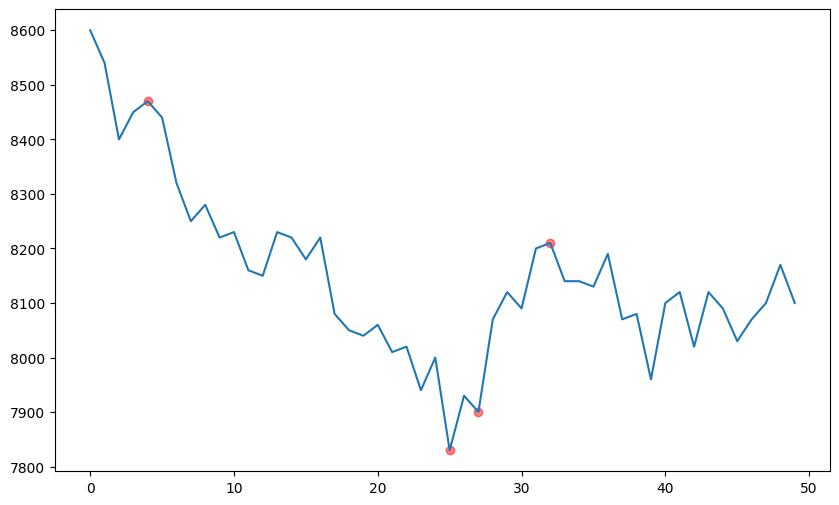

In [9]:
plt.figure(figsize=(10,6))
df.reset_index()['close'][:50].plot()
plt.scatter(minmax.index[:4],minmax.values[:4],color='red',alpha = 0.5)

In [10]:
from collections import defaultdict

def Reverse_Head_Shoulder(max_min):
    patterns = defaultdict(list)

    # Window range is 5 uni
    for i in range(5, len(max_min)):
        window = max_min.iloc[i-5:i]

        # Pattern must play out in less than n units
        if window.index[-1] - window.index[0] > 100:
            continue

        a, b, c, d, e = window.iloc[0:5]

        # RHS
        ratio = 1
        if a<b * 0.9  and c<a * ratio and c<e * ratio and c<d * ratio and e<d * 0.9 and abs(b-d)<=np.mean([b,d])*0.02:
               patterns['RHS'].append((window.index[0], window.index[-1]))

    return patterns

def Double_Top(max_min):
    patterns = defaultdict(list)
    for i in range(5, len(max_min)):
        window = max_min.iloc[i-5:i]

        if window.index[-1] - window.index[0] > 100:
            continue

        a, b, c, d, e = window.iloc[0:5]

        # Double TOP
        if a<b and a<c and c<b and c<d and e<d and e<c and abs(b-d)>=np.mean([b,d])*0.02:
               patterns['DT'].append((window.index[0], window.index[-1]))

    return patterns


def Double_Bottom(max_min):
    patterns = defaultdict(list)
    for i in range(5, len(max_min)):
        window = max_min.iloc[i-5:i]

        if window.index[-1] - window.index[0] > 100:
            continue

        a, b, c, d, e = window.iloc[0:5]

        # Double Bottom
        if b<a and c<a and c<e and d<c and d<e and b<c and abs(b-d)>=np.mean([b,d])*0.02:
               patterns['DB'].append((window.index[0], window.index[-1]))

    return patterns

def Head_Shoulder(max_min):
    patterns = defaultdict(list)
    for i in range(5, len(max_min)):
        window = max_min.iloc[i-5:i]

        if window.index[-1] - window.index[0] > 100:
            continue

        a, b, c, d, e = window.iloc[0:5]

        # Head_Shoulder
        if b<a and a<c and e<c and d<c and d<e and abs(b-d)<=np.mean([b,d])*0.02:
               patterns['HS'].append((window.index[0], window.index[-1]))

    return patterns



patterns = Reverse_Head_Shoulder(minmax)
patterns

defaultdict(list, {})

In [11]:
def plot_minmax_patterns(prices, max_min, patterns, window, ema):
    print()
    incr = str((prices.index[1] - prices.index[0])/60)

    if len(patterns) == 0:
        pass
    else:
        num_pat = len([x for x in patterns.items()][0][1])
        f, axes = plt.subplots(1, 2, figsize=(16, 5))
        axes = axes.flatten()
        prices_ = prices.reset_index()['close']
        axes[0].plot(prices_)
        axes[0].scatter(max_min.index, max_min, s=100, alpha=.3, color='orange')
        ok = False
        for name, end_day_nums in patterns.items():
            for i, tup in enumerate(end_day_nums):
                sd = tup[0]
                ed = tup[1]
                axes[1].plot(max_min.loc[sd:ed].index,
                              max_min.loc[sd:ed].values)
                axes[1].plot(prices_.loc[max(0, sd - 10):min(ed + 10, len(prices_))])
                plt.yticks([])
                ok = True
                break
            if ok:
                break

        plt.tight_layout()
        plt.title('{}: EMA {}, Window {} ({} patterns)'.format( incr, ema, window, num_pat))

In [12]:
def get_results(prices, max_min, pat, ema_, window_):

    incr = str((prices.index[1] - prices.index[0])/60)

    #fw_list = [1, 12, 24, 36]
    fw_list = [1, 2, 3]
    results = []
    if len(pat.items()) > 0:
        end_dates = [v for k, v in pat.items()][0]
        for date in end_dates:
            param_res = {
                         'increment': incr,
                         'ema': ema_,
                         'window': window_,
                         'date': date}
#             for x in fw_list:
#                 returns = (prices['close'].pct_change(x).shift(-x).reset_index(drop=True).dropna())
#                 try:
#                     param_res['fw_ret_{}'.format(x)] = returns.loc[date[1]]
#                 except Exception as e:
#                     param_res['fw_ret_{}'.format(x)] = e
            results.append(param_res)
    else:
        param_res = {
                     'increment': incr,
                     'ema': ema_,
                     'window': window_,
                     'date': None}
#         for x in fw_list:
#             param_res['fw_ret_{}'.format(x)] = None
#         results.append(param_res)
    return pd.DataFrame(results)

In [13]:
def Identifier_X(stock_data, ema_list, window_list, plot, results, Name):

    all_results = pd.DataFrame()
    prices = stock_data

    for ema_ in ema_list:
            for window_ in window_list:
                max_min = get_max_min(prices, smoothing=ema_, window_range=window_)
                if(Name=='RHS'):
                    pat = Reverse_Head_Shoulder(max_min)
                elif(Name=='DB'):
                    pat = Double_Bottom(max_min)
                elif(Name=='DT'):
                    pat = Double_Top(max_min)
                elif(Name=='HS'):
                    pat = Head_Shoulder(max_min)
                if plot == True:
                    plot_minmax_patterns(prices, max_min, pat, window_, ema_)

                if results == True:
                    all_results = pd.concat([all_results, get_results(prices, max_min, pat, ema_, window_)], axis=0)

    if results == True:
        return all_results.reset_index(drop=True)


,bucket,id,open,high,low,close,volume
date,,,,,,,
1.710835e+09,2024-03-19 08:00:00+00,1INCHBTC,8000.0,8000.0,7790.0,7830.0,60499.3
1.710853e+09,2024-03-19 13:00:00+00,1INCHBTC,8100.0,8110.0,8040.0,8090.0,7184.5
1.710886e+09,2024-03-19 22:00:00+00,1INCHBTC,8040.0,8040.0,7920.0,7960.0,7262.6
1.710886e+09,2024-03-19 22:00:00+00,1INCHBTC,8040.0,8040.0,7920.0,7960.0,7262.6
1.710896e+09,2024-03-20 01:00:00+00,1INCHBTC,8100.0,8110.0,8020.0,8020.0,9633.0
...,...,...,...,...,...,...,...
1.713240e+09,2024-04-16 04:00:00+00,1INCHBTC,6260.0,6280.0,6170.0,6180.0,22078.2
1.713244e+09,2024-04-16 05:00:00+00,1INCHBTC,6160.0,6280.0,6160.0,6240.0,6168.5
1.713280e+09,2024-04-16 15:00:00+00,1INCHBTC,6210.0,6210.0,6130.0,6160.0,6428.4


,bucket,id,open,high,low,close,volume
date,,,,,,,
1.710835e+09,2024-03-19 08:00:00+00,1INCHBTC,8000.0,8000.0,7790.0,7830.0,60499.3
1.710835e+09,2024-03-19 08:00:00+00,1INCHBTC,8000.0,8000.0,7790.0,7830.0,60499.3
1.710842e+09,2024-03-19 10:00:00+00,1INCHBTC,7900.0,7920.0,7840.0,7900.0,19883.1
1.710886e+09,2024-03-19 22:00:00+00,1INCHBTC,8040.0,8040.0,7920.0,7960.0,7262.6
1.710886e+09,2024-03-19 22:00:00+00,1INCHBTC,8040.0,8040.0,7920.0,7960.0,7262.6
...,...,...,...,...,...,...,...
1.713204e+09,2024-04-15 18:00:00+00,1INCHBTC,6260.0,6260.0,6110.0,6130.0,26708.6
1.713204e+09,2024-04-15 18:00:00+00,1INCHBTC,6260.0,6260.0,6110.0,6130.0,26708.6
1.713280e+09,2024-04-16 15:00:00+00,1INCHBTC,6210.0,6210.0,6130.0,6160.0,6428.4


,bucket,id,open,high,low,close,volume
date,,,,,,,
1.710835e+09,2024-03-19 08:00:00+00,1INCHBTC,8000.0,8000.0,7790.0,7830.0,60499.3
1.710835e+09,2024-03-19 08:00:00+00,1INCHBTC,8000.0,8000.0,7790.0,7830.0,60499.3
1.710835e+09,2024-03-19 08:00:00+00,1INCHBTC,8000.0,8000.0,7790.0,7830.0,60499.3
1.710835e+09,2024-03-19 08:00:00+00,1INCHBTC,8000.0,8000.0,7790.0,7830.0,60499.3
1.710835e+09,2024-03-19 08:00:00+00,1INCHBTC,8000.0,8000.0,7790.0,7830.0,60499.3
...,...,...,...,...,...,...,...
1.713204e+09,2024-04-15 18:00:00+00,1INCHBTC,6260.0,6260.0,6110.0,6130.0,26708.6
1.713204e+09,2024-04-15 18:00:00+00,1INCHBTC,6260.0,6260.0,6110.0,6130.0,26708.6
1.713204e+09,2024-04-15 18:00:00+00,1INCHBTC,6260.0,6260.0,6110.0,6130.0,26708.6


,bucket,id,open,high,low,close,volume
date,,,,,,,
1.710835e+09,2024-03-19 08:00:00+00,1INCHBTC,8000.0,8000.0,7790.0,7830.0,60499.3
1.710835e+09,2024-03-19 08:00:00+00,1INCHBTC,8000.0,8000.0,7790.0,7830.0,60499.3
1.710835e+09,2024-03-19 08:00:00+00,1INCHBTC,8000.0,8000.0,7790.0,7830.0,60499.3
1.710835e+09,2024-03-19 08:00:00+00,1INCHBTC,8000.0,8000.0,7790.0,7830.0,60499.3
1.710835e+09,2024-03-19 08:00:00+00,1INCHBTC,8000.0,8000.0,7790.0,7830.0,60499.3
...,...,...,...,...,...,...,...
1.713038e+09,2024-04-13 20:00:00+00,1INCHBTC,6230.0,6280.0,5370.0,5720.0,674216.0
1.713038e+09,2024-04-13 20:00:00+00,1INCHBTC,6230.0,6280.0,5370.0,5720.0,674216.0
1.713056e+09,2024-04-14 01:00:00+00,1INCHBTC,5960.0,6060.0,5930.0,6040.0,23728.8


,bucket,id,open,high,low,close,volume
date,,,,,,,
1.710814e+09,2024-03-19 02:00:00+00,1INCHBTC,8060.0,8130.0,8040.0,8040.0,5225.2
1.710842e+09,2024-03-19 10:00:00+00,1INCHBTC,7900.0,7920.0,7840.0,7900.0,19883.1
1.710886e+09,2024-03-19 22:00:00+00,1INCHBTC,8040.0,8040.0,7920.0,7960.0,7262.6
1.710886e+09,2024-03-19 22:00:00+00,1INCHBTC,8040.0,8040.0,7920.0,7960.0,7262.6
1.710911e+09,2024-03-20 05:00:00+00,1INCHBTC,8060.0,8080.0,7960.0,8070.0,12233.2
1.710950e+09,2024-03-20 16:00:00+00,1INCHBTC,8060.0,8100.0,7960.0,8040.0,21602.5
1.710997e+09,2024-03-21 05:00:00+00,1INCHBTC,8200.0,8200.0,8130.0,8180.0,11573.5
1.711033e+09,2024-03-21 15:00:00+00,1INCHBTC,8320.0,8350.0,8300.0,8310.0,35900.2
1.711116e+09,2024-03-22 14:00:00+00,1INCHBTC,8380.0,8380.0,8300.0,8340.0,14945.1


,bucket,id,open,high,low,close,volume
date,,,,,,,
1.710835e+09,2024-03-19 08:00:00+00,1INCHBTC,8000.0,8000.0,7790.0,7830.0,60499.3
1.710835e+09,2024-03-19 08:00:00+00,1INCHBTC,8000.0,8000.0,7790.0,7830.0,60499.3
1.710842e+09,2024-03-19 10:00:00+00,1INCHBTC,7900.0,7920.0,7840.0,7900.0,19883.1
1.710886e+09,2024-03-19 22:00:00+00,1INCHBTC,8040.0,8040.0,7920.0,7960.0,7262.6
1.710886e+09,2024-03-19 22:00:00+00,1INCHBTC,8040.0,8040.0,7920.0,7960.0,7262.6
1.710907e+09,2024-03-20 04:00:00+00,1INCHBTC,8110.0,8140.0,8030.0,8030.0,11811.4
1.710954e+09,2024-03-20 17:00:00+00,1INCHBTC,8050.0,8120.0,8040.0,8050.0,11147.5
1.711004e+09,2024-03-21 07:00:00+00,1INCHBTC,8150.0,8220.0,8130.0,8190.0,8242.9
1.711116e+09,2024-03-22 14:00:00+00,1INCHBTC,8380.0,8380.0,8300.0,8340.0,14945.1


,bucket,id,open,high,low,close,volume
date,,,,,,,
1.710835e+09,2024-03-19 08:00:00+00,1INCHBTC,8000.0,8000.0,7790.0,7830.0,60499.3
1.710835e+09,2024-03-19 08:00:00+00,1INCHBTC,8000.0,8000.0,7790.0,7830.0,60499.3
1.710835e+09,2024-03-19 08:00:00+00,1INCHBTC,8000.0,8000.0,7790.0,7830.0,60499.3
1.710886e+09,2024-03-19 22:00:00+00,1INCHBTC,8040.0,8040.0,7920.0,7960.0,7262.6
1.710886e+09,2024-03-19 22:00:00+00,1INCHBTC,8040.0,8040.0,7920.0,7960.0,7262.6
1.710950e+09,2024-03-20 16:00:00+00,1INCHBTC,8060.0,8100.0,7960.0,8040.0,21602.5
1.710972e+09,2024-03-20 22:00:00+00,1INCHBTC,8090.0,8100.0,8050.0,8080.0,4802.7
1.711044e+09,2024-03-21 18:00:00+00,1INCHBTC,8380.0,8380.0,8250.0,8320.0,11273.4
1.711116e+09,2024-03-22 14:00:00+00,1INCHBTC,8380.0,8380.0,8300.0,8340.0,14945.1


,bucket,id,open,high,low,close,volume
date,,,,,,,
1.710835e+09,2024-03-19 08:00:00+00,1INCHBTC,8000.0,8000.0,7790.0,7830.0,60499.3
1.710835e+09,2024-03-19 08:00:00+00,1INCHBTC,8000.0,8000.0,7790.0,7830.0,60499.3
1.710835e+09,2024-03-19 08:00:00+00,1INCHBTC,8000.0,8000.0,7790.0,7830.0,60499.3
1.710835e+09,2024-03-19 08:00:00+00,1INCHBTC,8000.0,8000.0,7790.0,7830.0,60499.3
1.710886e+09,2024-03-19 22:00:00+00,1INCHBTC,8040.0,8040.0,7920.0,7960.0,7262.6
1.710950e+09,2024-03-20 16:00:00+00,1INCHBTC,8060.0,8100.0,7960.0,8040.0,21602.5
1.711004e+09,2024-03-21 07:00:00+00,1INCHBTC,8150.0,8220.0,8130.0,8190.0,8242.9
1.711073e+09,2024-03-22 02:00:00+00,1INCHBTC,8400.0,8410.0,8330.0,8340.0,3217.2
1.711116e+09,2024-03-22 14:00:00+00,1INCHBTC,8380.0,8380.0,8300.0,8340.0,14945.1


,bucket,id,open,high,low,close,volume
date,,,,,,,
1.710788e+09,2024-03-18 19:00:00+00,1INCHBTC,8150.0,8210.0,8130.0,8150.0,11041.2
1.710814e+09,2024-03-19 02:00:00+00,1INCHBTC,8060.0,8130.0,8040.0,8040.0,5225.2
1.710821e+09,2024-03-19 04:00:00+00,1INCHBTC,8080.0,8110.0,8000.0,8010.0,7018.8
1.710853e+09,2024-03-19 13:00:00+00,1INCHBTC,8100.0,8110.0,8040.0,8090.0,7184.5
1.710886e+09,2024-03-19 22:00:00+00,1INCHBTC,8040.0,8040.0,7920.0,7960.0,7262.6
1.711073e+09,2024-03-22 02:00:00+00,1INCHBTC,8400.0,8410.0,8330.0,8340.0,3217.2
1.711102e+09,2024-03-22 10:00:00+00,1INCHBTC,8460.0,8460.0,8400.0,8400.0,3800.9
1.711210e+09,2024-03-23 16:00:00+00,1INCHBTC,8480.0,8480.0,8400.0,8400.0,2196.1
1.711210e+09,2024-03-23 16:00:00+00,1INCHBTC,8480.0,8480.0,8400.0,8400.0,2196.1


,bucket,id,open,high,low,close,volume
date,,,,,,,
1.710814e+09,2024-03-19 02:00:00+00,1INCHBTC,8060.0,8130.0,8040.0,8040.0,5225.2
1.710835e+09,2024-03-19 08:00:00+00,1INCHBTC,8000.0,8000.0,7790.0,7830.0,60499.3
1.710835e+09,2024-03-19 08:00:00+00,1INCHBTC,8000.0,8000.0,7790.0,7830.0,60499.3
1.710835e+09,2024-03-19 08:00:00+00,1INCHBTC,8000.0,8000.0,7790.0,7830.0,60499.3
1.710886e+09,2024-03-19 22:00:00+00,1INCHBTC,8040.0,8040.0,7920.0,7960.0,7262.6
1.711033e+09,2024-03-21 15:00:00+00,1INCHBTC,8320.0,8350.0,8300.0,8310.0,35900.2
1.711073e+09,2024-03-22 02:00:00+00,1INCHBTC,8400.0,8410.0,8330.0,8340.0,3217.2
1.711210e+09,2024-03-23 16:00:00+00,1INCHBTC,8480.0,8480.0,8400.0,8400.0,2196.1
1.711210e+09,2024-03-23 16:00:00+00,1INCHBTC,8480.0,8480.0,8400.0,8400.0,2196.1


,bucket,id,open,high,low,close,volume
date,,,,,,,
1.710835e+09,2024-03-19 08:00:00+00,1INCHBTC,8000.0,8000.0,7790.0,7830.0,60499.3
1.710835e+09,2024-03-19 08:00:00+00,1INCHBTC,8000.0,8000.0,7790.0,7830.0,60499.3
1.711001e+09,2024-03-21 06:00:00+00,1INCHBTC,8160.0,8200.0,8130.0,8150.0,12787.4
1.711033e+09,2024-03-21 15:00:00+00,1INCHBTC,8320.0,8350.0,8300.0,8310.0,35900.2
1.711138e+09,2024-03-22 20:00:00+00,1INCHBTC,8410.0,8410.0,8360.0,8370.0,5538.5
1.711138e+09,2024-03-22 20:00:00+00,1INCHBTC,8410.0,8410.0,8360.0,8370.0,5538.5
1.711210e+09,2024-03-23 16:00:00+00,1INCHBTC,8480.0,8480.0,8400.0,8400.0,2196.1
1.711210e+09,2024-03-23 16:00:00+00,1INCHBTC,8480.0,8480.0,8400.0,8400.0,2196.1
1.711300e+09,2024-03-24 17:00:00+00,1INCHBTC,8470.0,8500.0,8400.0,8400.0,6856.5


,bucket,id,open,high,low,close,volume
date,,,,,,,
1.710835e+09,2024-03-19 08:00:00+00,1INCHBTC,8000.0,8000.0,7790.0,7830.0,60499.3
1.710835e+09,2024-03-19 08:00:00+00,1INCHBTC,8000.0,8000.0,7790.0,7830.0,60499.3
1.710972e+09,2024-03-20 22:00:00+00,1INCHBTC,8090.0,8100.0,8050.0,8080.0,4802.7
1.711001e+09,2024-03-21 06:00:00+00,1INCHBTC,8160.0,8200.0,8130.0,8150.0,12787.4
1.711116e+09,2024-03-22 14:00:00+00,1INCHBTC,8380.0,8380.0,8300.0,8340.0,14945.1
1.711116e+09,2024-03-22 14:00:00+00,1INCHBTC,8380.0,8380.0,8300.0,8340.0,14945.1
1.711138e+09,2024-03-22 20:00:00+00,1INCHBTC,8410.0,8410.0,8360.0,8370.0,5538.5
1.711379e+09,2024-03-25 15:00:00+00,1INCHBTC,8360.0,8390.0,8300.0,8340.0,30824.4
1.711397e+09,2024-03-25 20:00:00+00,1INCHBTC,8320.0,8340.0,8310.0,8310.0,1828.3


,bucket,id,open,high,low,close,volume
date,,,,,,,
1.710814e+09,2024-03-19 02:00:00+00,1INCHBTC,8060.0,8130.0,8040.0,8040.0,5225.2
1.710842e+09,2024-03-19 10:00:00+00,1INCHBTC,7900.0,7920.0,7840.0,7900.0,19883.1
1.710878e+09,2024-03-19 20:00:00+00,1INCHBTC,8190.0,8190.0,8070.0,8070.0,10079.3
1.711073e+09,2024-03-22 02:00:00+00,1INCHBTC,8400.0,8410.0,8330.0,8340.0,3217.2
1.711174e+09,2024-03-23 06:00:00+00,1INCHBTC,8440.0,8460.0,8430.0,8450.0,2058.1
1.711210e+09,2024-03-23 16:00:00+00,1INCHBTC,8480.0,8480.0,8400.0,8400.0,2196.1
1.711253e+09,2024-03-24 04:00:00+00,1INCHBTC,8480.0,8510.0,8470.0,8480.0,4423.8
1.711264e+09,2024-03-24 07:00:00+00,1INCHBTC,8450.0,8470.0,8450.0,8460.0,1501.0
1.711300e+09,2024-03-24 17:00:00+00,1INCHBTC,8470.0,8500.0,8400.0,8400.0,6856.5


,bucket,id,open,high,low,close,volume
date,,,,,,,
1.710835e+09,2024-03-19 08:00:00+00,1INCHBTC,8000.0,8000.0,7790.0,7830.0,60499.3
1.710835e+09,2024-03-19 08:00:00+00,1INCHBTC,8000.0,8000.0,7790.0,7830.0,60499.3
1.710835e+09,2024-03-19 08:00:00+00,1INCHBTC,8000.0,8000.0,7790.0,7830.0,60499.3
1.711033e+09,2024-03-21 15:00:00+00,1INCHBTC,8320.0,8350.0,8300.0,8310.0,35900.2
1.711210e+09,2024-03-23 16:00:00+00,1INCHBTC,8480.0,8480.0,8400.0,8400.0,2196.1
1.711210e+09,2024-03-23 16:00:00+00,1INCHBTC,8480.0,8480.0,8400.0,8400.0,2196.1
1.711213e+09,2024-03-23 17:00:00+00,1INCHBTC,8390.0,8430.0,8380.0,8430.0,1836.0
1.711282e+09,2024-03-24 12:00:00+00,1INCHBTC,8440.0,8450.0,8420.0,8440.0,17124.6
1.711300e+09,2024-03-24 17:00:00+00,1INCHBTC,8470.0,8500.0,8400.0,8400.0,6856.5


,bucket,id,open,high,low,close,volume
date,,,,,,,
1.710835e+09,2024-03-19 08:00:00+00,1INCHBTC,8000.0,8000.0,7790.0,7830.0,60499.3
1.710835e+09,2024-03-19 08:00:00+00,1INCHBTC,8000.0,8000.0,7790.0,7830.0,60499.3
1.711001e+09,2024-03-21 06:00:00+00,1INCHBTC,8160.0,8200.0,8130.0,8150.0,12787.4
1.711116e+09,2024-03-22 14:00:00+00,1INCHBTC,8380.0,8380.0,8300.0,8340.0,14945.1
1.711145e+09,2024-03-22 22:00:00+00,1INCHBTC,8410.0,8410.0,8360.0,8400.0,1203.2
1.711210e+09,2024-03-23 16:00:00+00,1INCHBTC,8480.0,8480.0,8400.0,8400.0,2196.1
1.711210e+09,2024-03-23 16:00:00+00,1INCHBTC,8480.0,8480.0,8400.0,8400.0,2196.1
1.711300e+09,2024-03-24 17:00:00+00,1INCHBTC,8470.0,8500.0,8400.0,8400.0,6856.5
1.711397e+09,2024-03-25 20:00:00+00,1INCHBTC,8320.0,8340.0,8310.0,8310.0,1828.3


,bucket,id,open,high,low,close,volume
date,,,,,,,
1.710835e+09,2024-03-19 08:00:00+00,1INCHBTC,8000.0,8000.0,7790.0,7830.0,60499.3
1.710972e+09,2024-03-20 22:00:00+00,1INCHBTC,8090.0,8100.0,8050.0,8080.0,4802.7
1.711116e+09,2024-03-22 14:00:00+00,1INCHBTC,8380.0,8380.0,8300.0,8340.0,14945.1
1.711116e+09,2024-03-22 14:00:00+00,1INCHBTC,8380.0,8380.0,8300.0,8340.0,14945.1
1.711141e+09,2024-03-22 21:00:00+00,1INCHBTC,8380.0,8440.0,8360.0,8400.0,9341.2
1.711210e+09,2024-03-23 16:00:00+00,1INCHBTC,8480.0,8480.0,8400.0,8400.0,2196.1
1.711397e+09,2024-03-25 20:00:00+00,1INCHBTC,8320.0,8340.0,8310.0,8310.0,1828.3
1.711397e+09,2024-03-25 20:00:00+00,1INCHBTC,8320.0,8340.0,8310.0,8310.0,1828.3
1.711588e+09,2024-03-28 01:00:00+00,1INCHBTC,8380.0,8380.0,8320.0,8340.0,17765.6


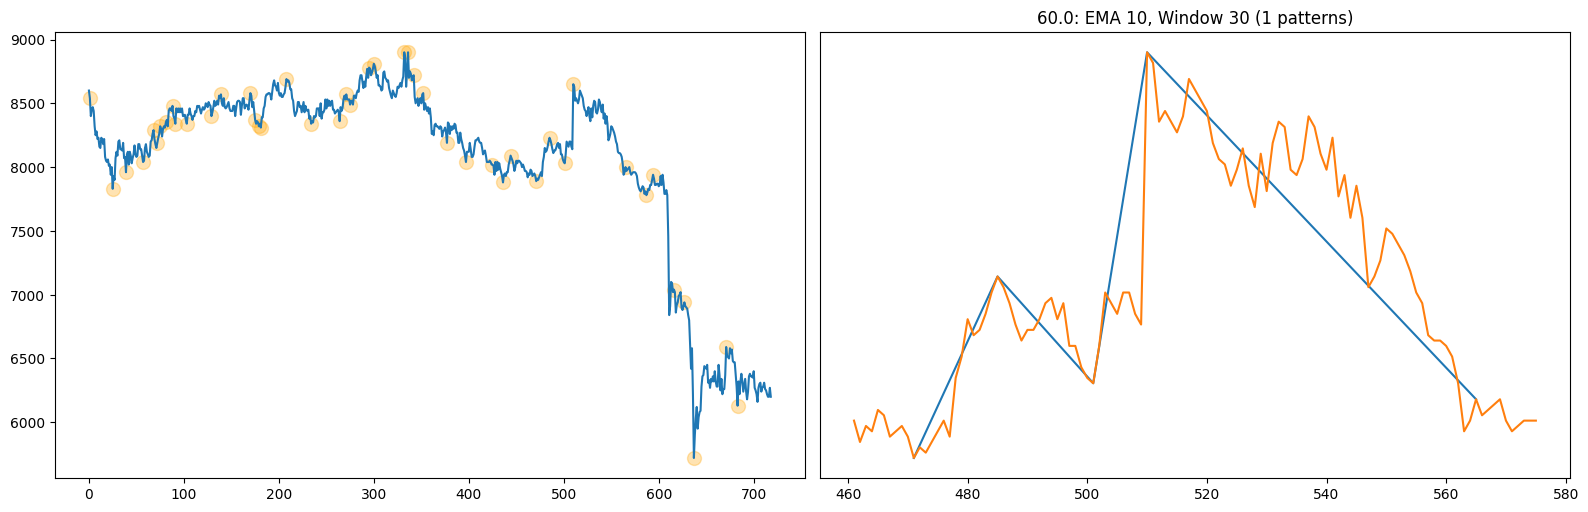

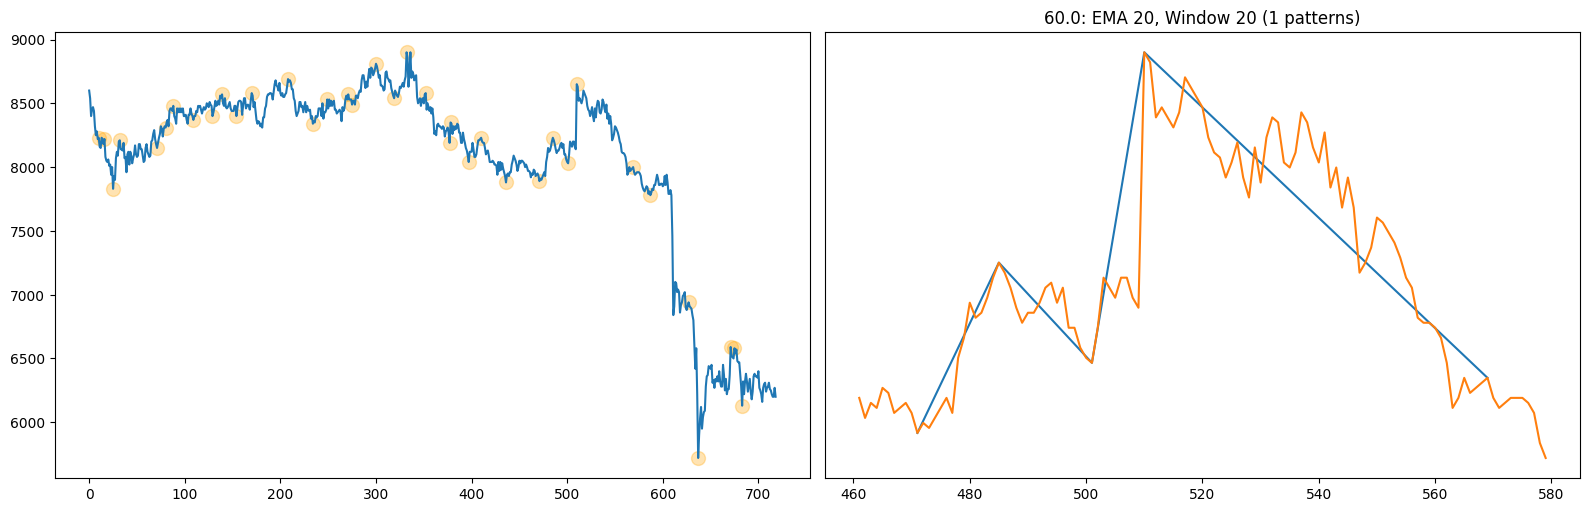

In [14]:
ema_list= [3,10,20,30,]
window_list = [3,10,20,30]
results_Mul = Identifier_X(df,ema_list,window_list,plot=True,results=True,Name='DT')

In [15]:
ema_list= [3,10,20,30,]
window_list = [3,10,20,30]
results_Mul1 = Identifier_X(df,ema_list,window_list,plot=True,results=True,Name='RHS')

,bucket,id,open,high,low,close,volume
date,,,,,,,
1.710835e+09,2024-03-19 08:00:00+00,1INCHBTC,8000.0,8000.0,7790.0,7830.0,60499.3
1.710853e+09,2024-03-19 13:00:00+00,1INCHBTC,8100.0,8110.0,8040.0,8090.0,7184.5
1.710886e+09,2024-03-19 22:00:00+00,1INCHBTC,8040.0,8040.0,7920.0,7960.0,7262.6
1.710886e+09,2024-03-19 22:00:00+00,1INCHBTC,8040.0,8040.0,7920.0,7960.0,7262.6
1.710896e+09,2024-03-20 01:00:00+00,1INCHBTC,8100.0,8110.0,8020.0,8020.0,9633.0
...,...,...,...,...,...,...,...
1.713240e+09,2024-04-16 04:00:00+00,1INCHBTC,6260.0,6280.0,6170.0,6180.0,22078.2
1.713244e+09,2024-04-16 05:00:00+00,1INCHBTC,6160.0,6280.0,6160.0,6240.0,6168.5
1.713280e+09,2024-04-16 15:00:00+00,1INCHBTC,6210.0,6210.0,6130.0,6160.0,6428.4


,bucket,id,open,high,low,close,volume
date,,,,,,,
1.710835e+09,2024-03-19 08:00:00+00,1INCHBTC,8000.0,8000.0,7790.0,7830.0,60499.3
1.710835e+09,2024-03-19 08:00:00+00,1INCHBTC,8000.0,8000.0,7790.0,7830.0,60499.3
1.710842e+09,2024-03-19 10:00:00+00,1INCHBTC,7900.0,7920.0,7840.0,7900.0,19883.1
1.710886e+09,2024-03-19 22:00:00+00,1INCHBTC,8040.0,8040.0,7920.0,7960.0,7262.6
1.710886e+09,2024-03-19 22:00:00+00,1INCHBTC,8040.0,8040.0,7920.0,7960.0,7262.6
...,...,...,...,...,...,...,...
1.713204e+09,2024-04-15 18:00:00+00,1INCHBTC,6260.0,6260.0,6110.0,6130.0,26708.6
1.713204e+09,2024-04-15 18:00:00+00,1INCHBTC,6260.0,6260.0,6110.0,6130.0,26708.6
1.713280e+09,2024-04-16 15:00:00+00,1INCHBTC,6210.0,6210.0,6130.0,6160.0,6428.4


,bucket,id,open,high,low,close,volume
date,,,,,,,
1.710835e+09,2024-03-19 08:00:00+00,1INCHBTC,8000.0,8000.0,7790.0,7830.0,60499.3
1.710835e+09,2024-03-19 08:00:00+00,1INCHBTC,8000.0,8000.0,7790.0,7830.0,60499.3
1.710835e+09,2024-03-19 08:00:00+00,1INCHBTC,8000.0,8000.0,7790.0,7830.0,60499.3
1.710835e+09,2024-03-19 08:00:00+00,1INCHBTC,8000.0,8000.0,7790.0,7830.0,60499.3
1.710835e+09,2024-03-19 08:00:00+00,1INCHBTC,8000.0,8000.0,7790.0,7830.0,60499.3
...,...,...,...,...,...,...,...
1.713204e+09,2024-04-15 18:00:00+00,1INCHBTC,6260.0,6260.0,6110.0,6130.0,26708.6
1.713204e+09,2024-04-15 18:00:00+00,1INCHBTC,6260.0,6260.0,6110.0,6130.0,26708.6
1.713204e+09,2024-04-15 18:00:00+00,1INCHBTC,6260.0,6260.0,6110.0,6130.0,26708.6


,bucket,id,open,high,low,close,volume
date,,,,,,,
1.710835e+09,2024-03-19 08:00:00+00,1INCHBTC,8000.0,8000.0,7790.0,7830.0,60499.3
1.710835e+09,2024-03-19 08:00:00+00,1INCHBTC,8000.0,8000.0,7790.0,7830.0,60499.3
1.710835e+09,2024-03-19 08:00:00+00,1INCHBTC,8000.0,8000.0,7790.0,7830.0,60499.3
1.710835e+09,2024-03-19 08:00:00+00,1INCHBTC,8000.0,8000.0,7790.0,7830.0,60499.3
1.710835e+09,2024-03-19 08:00:00+00,1INCHBTC,8000.0,8000.0,7790.0,7830.0,60499.3
...,...,...,...,...,...,...,...
1.713038e+09,2024-04-13 20:00:00+00,1INCHBTC,6230.0,6280.0,5370.0,5720.0,674216.0
1.713038e+09,2024-04-13 20:00:00+00,1INCHBTC,6230.0,6280.0,5370.0,5720.0,674216.0
1.713056e+09,2024-04-14 01:00:00+00,1INCHBTC,5960.0,6060.0,5930.0,6040.0,23728.8


,bucket,id,open,high,low,close,volume
date,,,,,,,
1.710814e+09,2024-03-19 02:00:00+00,1INCHBTC,8060.0,8130.0,8040.0,8040.0,5225.2
1.710842e+09,2024-03-19 10:00:00+00,1INCHBTC,7900.0,7920.0,7840.0,7900.0,19883.1
1.710886e+09,2024-03-19 22:00:00+00,1INCHBTC,8040.0,8040.0,7920.0,7960.0,7262.6
1.710886e+09,2024-03-19 22:00:00+00,1INCHBTC,8040.0,8040.0,7920.0,7960.0,7262.6
1.710911e+09,2024-03-20 05:00:00+00,1INCHBTC,8060.0,8080.0,7960.0,8070.0,12233.2
1.710950e+09,2024-03-20 16:00:00+00,1INCHBTC,8060.0,8100.0,7960.0,8040.0,21602.5
1.710997e+09,2024-03-21 05:00:00+00,1INCHBTC,8200.0,8200.0,8130.0,8180.0,11573.5
1.711033e+09,2024-03-21 15:00:00+00,1INCHBTC,8320.0,8350.0,8300.0,8310.0,35900.2
1.711116e+09,2024-03-22 14:00:00+00,1INCHBTC,8380.0,8380.0,8300.0,8340.0,14945.1


,bucket,id,open,high,low,close,volume
date,,,,,,,
1.710835e+09,2024-03-19 08:00:00+00,1INCHBTC,8000.0,8000.0,7790.0,7830.0,60499.3
1.710835e+09,2024-03-19 08:00:00+00,1INCHBTC,8000.0,8000.0,7790.0,7830.0,60499.3
1.710842e+09,2024-03-19 10:00:00+00,1INCHBTC,7900.0,7920.0,7840.0,7900.0,19883.1
1.710886e+09,2024-03-19 22:00:00+00,1INCHBTC,8040.0,8040.0,7920.0,7960.0,7262.6
1.710886e+09,2024-03-19 22:00:00+00,1INCHBTC,8040.0,8040.0,7920.0,7960.0,7262.6
1.710907e+09,2024-03-20 04:00:00+00,1INCHBTC,8110.0,8140.0,8030.0,8030.0,11811.4
1.710954e+09,2024-03-20 17:00:00+00,1INCHBTC,8050.0,8120.0,8040.0,8050.0,11147.5
1.711004e+09,2024-03-21 07:00:00+00,1INCHBTC,8150.0,8220.0,8130.0,8190.0,8242.9
1.711116e+09,2024-03-22 14:00:00+00,1INCHBTC,8380.0,8380.0,8300.0,8340.0,14945.1


,bucket,id,open,high,low,close,volume
date,,,,,,,
1.710835e+09,2024-03-19 08:00:00+00,1INCHBTC,8000.0,8000.0,7790.0,7830.0,60499.3
1.710835e+09,2024-03-19 08:00:00+00,1INCHBTC,8000.0,8000.0,7790.0,7830.0,60499.3
1.710835e+09,2024-03-19 08:00:00+00,1INCHBTC,8000.0,8000.0,7790.0,7830.0,60499.3
1.710886e+09,2024-03-19 22:00:00+00,1INCHBTC,8040.0,8040.0,7920.0,7960.0,7262.6
1.710886e+09,2024-03-19 22:00:00+00,1INCHBTC,8040.0,8040.0,7920.0,7960.0,7262.6
1.710950e+09,2024-03-20 16:00:00+00,1INCHBTC,8060.0,8100.0,7960.0,8040.0,21602.5
1.710972e+09,2024-03-20 22:00:00+00,1INCHBTC,8090.0,8100.0,8050.0,8080.0,4802.7
1.711044e+09,2024-03-21 18:00:00+00,1INCHBTC,8380.0,8380.0,8250.0,8320.0,11273.4
1.711116e+09,2024-03-22 14:00:00+00,1INCHBTC,8380.0,8380.0,8300.0,8340.0,14945.1


,bucket,id,open,high,low,close,volume
date,,,,,,,
1.710835e+09,2024-03-19 08:00:00+00,1INCHBTC,8000.0,8000.0,7790.0,7830.0,60499.3
1.710835e+09,2024-03-19 08:00:00+00,1INCHBTC,8000.0,8000.0,7790.0,7830.0,60499.3
1.710835e+09,2024-03-19 08:00:00+00,1INCHBTC,8000.0,8000.0,7790.0,7830.0,60499.3
1.710835e+09,2024-03-19 08:00:00+00,1INCHBTC,8000.0,8000.0,7790.0,7830.0,60499.3
1.710886e+09,2024-03-19 22:00:00+00,1INCHBTC,8040.0,8040.0,7920.0,7960.0,7262.6
1.710950e+09,2024-03-20 16:00:00+00,1INCHBTC,8060.0,8100.0,7960.0,8040.0,21602.5
1.711004e+09,2024-03-21 07:00:00+00,1INCHBTC,8150.0,8220.0,8130.0,8190.0,8242.9
1.711073e+09,2024-03-22 02:00:00+00,1INCHBTC,8400.0,8410.0,8330.0,8340.0,3217.2
1.711116e+09,2024-03-22 14:00:00+00,1INCHBTC,8380.0,8380.0,8300.0,8340.0,14945.1


,bucket,id,open,high,low,close,volume
date,,,,,,,
1.710788e+09,2024-03-18 19:00:00+00,1INCHBTC,8150.0,8210.0,8130.0,8150.0,11041.2
1.710814e+09,2024-03-19 02:00:00+00,1INCHBTC,8060.0,8130.0,8040.0,8040.0,5225.2
1.710821e+09,2024-03-19 04:00:00+00,1INCHBTC,8080.0,8110.0,8000.0,8010.0,7018.8
1.710853e+09,2024-03-19 13:00:00+00,1INCHBTC,8100.0,8110.0,8040.0,8090.0,7184.5
1.710886e+09,2024-03-19 22:00:00+00,1INCHBTC,8040.0,8040.0,7920.0,7960.0,7262.6
1.711073e+09,2024-03-22 02:00:00+00,1INCHBTC,8400.0,8410.0,8330.0,8340.0,3217.2
1.711102e+09,2024-03-22 10:00:00+00,1INCHBTC,8460.0,8460.0,8400.0,8400.0,3800.9
1.711210e+09,2024-03-23 16:00:00+00,1INCHBTC,8480.0,8480.0,8400.0,8400.0,2196.1
1.711210e+09,2024-03-23 16:00:00+00,1INCHBTC,8480.0,8480.0,8400.0,8400.0,2196.1


,bucket,id,open,high,low,close,volume
date,,,,,,,
1.710814e+09,2024-03-19 02:00:00+00,1INCHBTC,8060.0,8130.0,8040.0,8040.0,5225.2
1.710835e+09,2024-03-19 08:00:00+00,1INCHBTC,8000.0,8000.0,7790.0,7830.0,60499.3
1.710835e+09,2024-03-19 08:00:00+00,1INCHBTC,8000.0,8000.0,7790.0,7830.0,60499.3
1.710835e+09,2024-03-19 08:00:00+00,1INCHBTC,8000.0,8000.0,7790.0,7830.0,60499.3
1.710886e+09,2024-03-19 22:00:00+00,1INCHBTC,8040.0,8040.0,7920.0,7960.0,7262.6
1.711033e+09,2024-03-21 15:00:00+00,1INCHBTC,8320.0,8350.0,8300.0,8310.0,35900.2
1.711073e+09,2024-03-22 02:00:00+00,1INCHBTC,8400.0,8410.0,8330.0,8340.0,3217.2
1.711210e+09,2024-03-23 16:00:00+00,1INCHBTC,8480.0,8480.0,8400.0,8400.0,2196.1
1.711210e+09,2024-03-23 16:00:00+00,1INCHBTC,8480.0,8480.0,8400.0,8400.0,2196.1


,bucket,id,open,high,low,close,volume
date,,,,,,,
1.710835e+09,2024-03-19 08:00:00+00,1INCHBTC,8000.0,8000.0,7790.0,7830.0,60499.3
1.710835e+09,2024-03-19 08:00:00+00,1INCHBTC,8000.0,8000.0,7790.0,7830.0,60499.3
1.711001e+09,2024-03-21 06:00:00+00,1INCHBTC,8160.0,8200.0,8130.0,8150.0,12787.4
1.711033e+09,2024-03-21 15:00:00+00,1INCHBTC,8320.0,8350.0,8300.0,8310.0,35900.2
1.711138e+09,2024-03-22 20:00:00+00,1INCHBTC,8410.0,8410.0,8360.0,8370.0,5538.5
1.711138e+09,2024-03-22 20:00:00+00,1INCHBTC,8410.0,8410.0,8360.0,8370.0,5538.5
1.711210e+09,2024-03-23 16:00:00+00,1INCHBTC,8480.0,8480.0,8400.0,8400.0,2196.1
1.711210e+09,2024-03-23 16:00:00+00,1INCHBTC,8480.0,8480.0,8400.0,8400.0,2196.1
1.711300e+09,2024-03-24 17:00:00+00,1INCHBTC,8470.0,8500.0,8400.0,8400.0,6856.5


,bucket,id,open,high,low,close,volume
date,,,,,,,
1.710835e+09,2024-03-19 08:00:00+00,1INCHBTC,8000.0,8000.0,7790.0,7830.0,60499.3
1.710835e+09,2024-03-19 08:00:00+00,1INCHBTC,8000.0,8000.0,7790.0,7830.0,60499.3
1.710972e+09,2024-03-20 22:00:00+00,1INCHBTC,8090.0,8100.0,8050.0,8080.0,4802.7
1.711001e+09,2024-03-21 06:00:00+00,1INCHBTC,8160.0,8200.0,8130.0,8150.0,12787.4
1.711116e+09,2024-03-22 14:00:00+00,1INCHBTC,8380.0,8380.0,8300.0,8340.0,14945.1
1.711116e+09,2024-03-22 14:00:00+00,1INCHBTC,8380.0,8380.0,8300.0,8340.0,14945.1
1.711138e+09,2024-03-22 20:00:00+00,1INCHBTC,8410.0,8410.0,8360.0,8370.0,5538.5
1.711379e+09,2024-03-25 15:00:00+00,1INCHBTC,8360.0,8390.0,8300.0,8340.0,30824.4
1.711397e+09,2024-03-25 20:00:00+00,1INCHBTC,8320.0,8340.0,8310.0,8310.0,1828.3


,bucket,id,open,high,low,close,volume
date,,,,,,,
1.710814e+09,2024-03-19 02:00:00+00,1INCHBTC,8060.0,8130.0,8040.0,8040.0,5225.2
1.710842e+09,2024-03-19 10:00:00+00,1INCHBTC,7900.0,7920.0,7840.0,7900.0,19883.1
1.710878e+09,2024-03-19 20:00:00+00,1INCHBTC,8190.0,8190.0,8070.0,8070.0,10079.3
1.711073e+09,2024-03-22 02:00:00+00,1INCHBTC,8400.0,8410.0,8330.0,8340.0,3217.2
1.711174e+09,2024-03-23 06:00:00+00,1INCHBTC,8440.0,8460.0,8430.0,8450.0,2058.1
1.711210e+09,2024-03-23 16:00:00+00,1INCHBTC,8480.0,8480.0,8400.0,8400.0,2196.1
1.711253e+09,2024-03-24 04:00:00+00,1INCHBTC,8480.0,8510.0,8470.0,8480.0,4423.8
1.711264e+09,2024-03-24 07:00:00+00,1INCHBTC,8450.0,8470.0,8450.0,8460.0,1501.0
1.711300e+09,2024-03-24 17:00:00+00,1INCHBTC,8470.0,8500.0,8400.0,8400.0,6856.5


,bucket,id,open,high,low,close,volume
date,,,,,,,
1.710835e+09,2024-03-19 08:00:00+00,1INCHBTC,8000.0,8000.0,7790.0,7830.0,60499.3
1.710835e+09,2024-03-19 08:00:00+00,1INCHBTC,8000.0,8000.0,7790.0,7830.0,60499.3
1.710835e+09,2024-03-19 08:00:00+00,1INCHBTC,8000.0,8000.0,7790.0,7830.0,60499.3
1.711033e+09,2024-03-21 15:00:00+00,1INCHBTC,8320.0,8350.0,8300.0,8310.0,35900.2
1.711210e+09,2024-03-23 16:00:00+00,1INCHBTC,8480.0,8480.0,8400.0,8400.0,2196.1
1.711210e+09,2024-03-23 16:00:00+00,1INCHBTC,8480.0,8480.0,8400.0,8400.0,2196.1
1.711213e+09,2024-03-23 17:00:00+00,1INCHBTC,8390.0,8430.0,8380.0,8430.0,1836.0
1.711282e+09,2024-03-24 12:00:00+00,1INCHBTC,8440.0,8450.0,8420.0,8440.0,17124.6
1.711300e+09,2024-03-24 17:00:00+00,1INCHBTC,8470.0,8500.0,8400.0,8400.0,6856.5


,bucket,id,open,high,low,close,volume
date,,,,,,,
1.710835e+09,2024-03-19 08:00:00+00,1INCHBTC,8000.0,8000.0,7790.0,7830.0,60499.3
1.710835e+09,2024-03-19 08:00:00+00,1INCHBTC,8000.0,8000.0,7790.0,7830.0,60499.3
1.711001e+09,2024-03-21 06:00:00+00,1INCHBTC,8160.0,8200.0,8130.0,8150.0,12787.4
1.711116e+09,2024-03-22 14:00:00+00,1INCHBTC,8380.0,8380.0,8300.0,8340.0,14945.1
1.711145e+09,2024-03-22 22:00:00+00,1INCHBTC,8410.0,8410.0,8360.0,8400.0,1203.2
1.711210e+09,2024-03-23 16:00:00+00,1INCHBTC,8480.0,8480.0,8400.0,8400.0,2196.1
1.711210e+09,2024-03-23 16:00:00+00,1INCHBTC,8480.0,8480.0,8400.0,8400.0,2196.1
1.711300e+09,2024-03-24 17:00:00+00,1INCHBTC,8470.0,8500.0,8400.0,8400.0,6856.5
1.711397e+09,2024-03-25 20:00:00+00,1INCHBTC,8320.0,8340.0,8310.0,8310.0,1828.3


,bucket,id,open,high,low,close,volume
date,,,,,,,
1.710835e+09,2024-03-19 08:00:00+00,1INCHBTC,8000.0,8000.0,7790.0,7830.0,60499.3
1.710972e+09,2024-03-20 22:00:00+00,1INCHBTC,8090.0,8100.0,8050.0,8080.0,4802.7
1.711116e+09,2024-03-22 14:00:00+00,1INCHBTC,8380.0,8380.0,8300.0,8340.0,14945.1
1.711116e+09,2024-03-22 14:00:00+00,1INCHBTC,8380.0,8380.0,8300.0,8340.0,14945.1
1.711141e+09,2024-03-22 21:00:00+00,1INCHBTC,8380.0,8440.0,8360.0,8400.0,9341.2
1.711210e+09,2024-03-23 16:00:00+00,1INCHBTC,8480.0,8480.0,8400.0,8400.0,2196.1
1.711397e+09,2024-03-25 20:00:00+00,1INCHBTC,8320.0,8340.0,8310.0,8310.0,1828.3
1.711397e+09,2024-03-25 20:00:00+00,1INCHBTC,8320.0,8340.0,8310.0,8310.0,1828.3
1.711588e+09,2024-03-28 01:00:00+00,1INCHBTC,8380.0,8380.0,8320.0,8340.0,17765.6
